In [17]:
import scanpy as sc
import infercnvpy as cnv
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter("ignore")

sc.settings.set_figure_params(figsize=(5, 5))

AttributeError: module 'IPython.display' has no attribute 'set_matplotlib_formats'

In [18]:
sc.logging.print_header()

Package,Version
pandas,2.2.3
scanpy,1.11.0
infercnvpy,0.6.0
matplotlib,3.10.1
anndata,0.11.3
Component,Info
Python,"3.13.2 (main, Feb 4 2025, 14:51:09) [Clang 16.0.0 (clang-1600.0.26.6)]"
OS,macOS-15.3.2-arm64-arm-64bit-Mach-O
CPU,"8 logical CPU cores, arm"
GPU,No GPU found


In [19]:
adata = cnv.datasets.maynard2020_3k()
adata.var.loc[:, ["ensg", "chromosome", "start", "end"]].head()

,ensg,chromosome,start,end
symbol,,,,
AL645933.5,ENSG00000288587.1,chr6,31400702,31463705
AC010184.1,ENSG00000288585.1,chr3,141449745,141456434
AC023296.1,ENSG00000288580.1,chr8,2923568,2926689
AL117334.2,ENSG00000288577.1,chr20,3406380,3410036
AC107294.4,ENSG00000288576.1,chr3,184778723,184780720


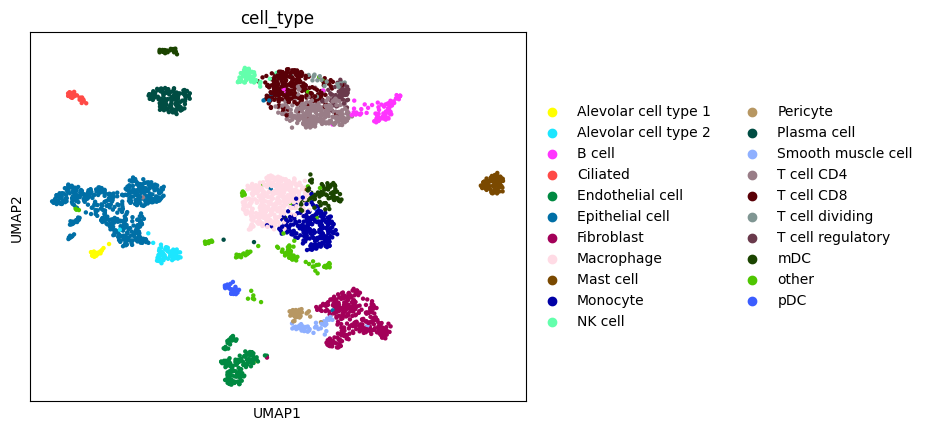

In [20]:
sc.pl.umap(adata, color="cell_type")

In [21]:
# We provide all immune cell types as "normal cells".
cnv.tl.infercnv(
    adata,
    reference_key="cell_type",
    reference_cat=[
        "B cell",
        "Macrophage",
        "Mast cell",
        "Monocyte",
        "NK cell",
        "Plasma cell",
        "T cell CD4",
        "T cell CD8",
        "T cell regulatory",
        "mDC",
        "pDC",
    ],
    window_size=250,
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.21s/it]


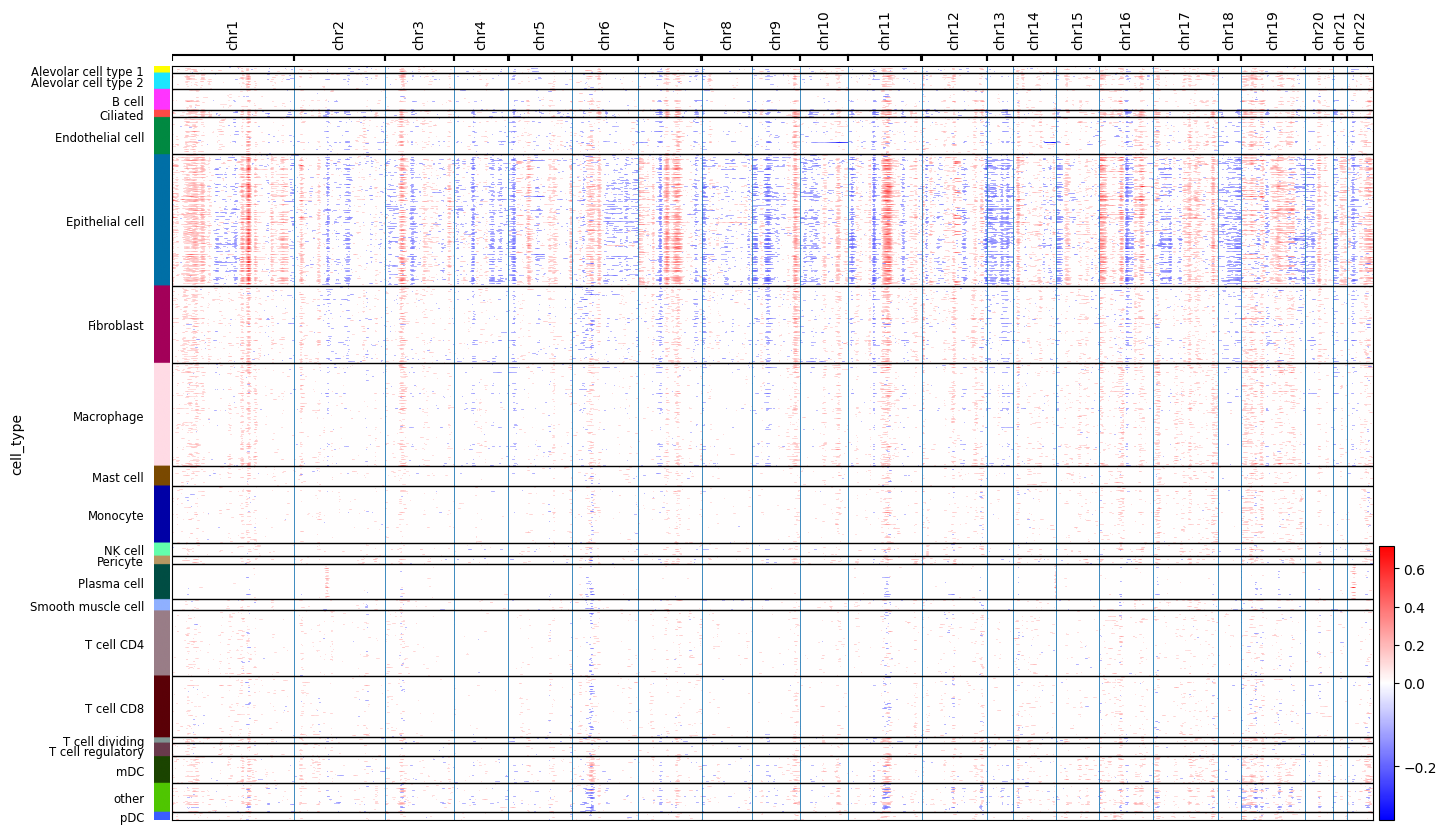

In [22]:
cnv.pl.chromosome_heatmap(adata, groupby="cell_type")

In [23]:
cnv.tl.pca(adata)
cnv.pp.neighbors(adata)
cnv.tl.leiden(adata)

categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


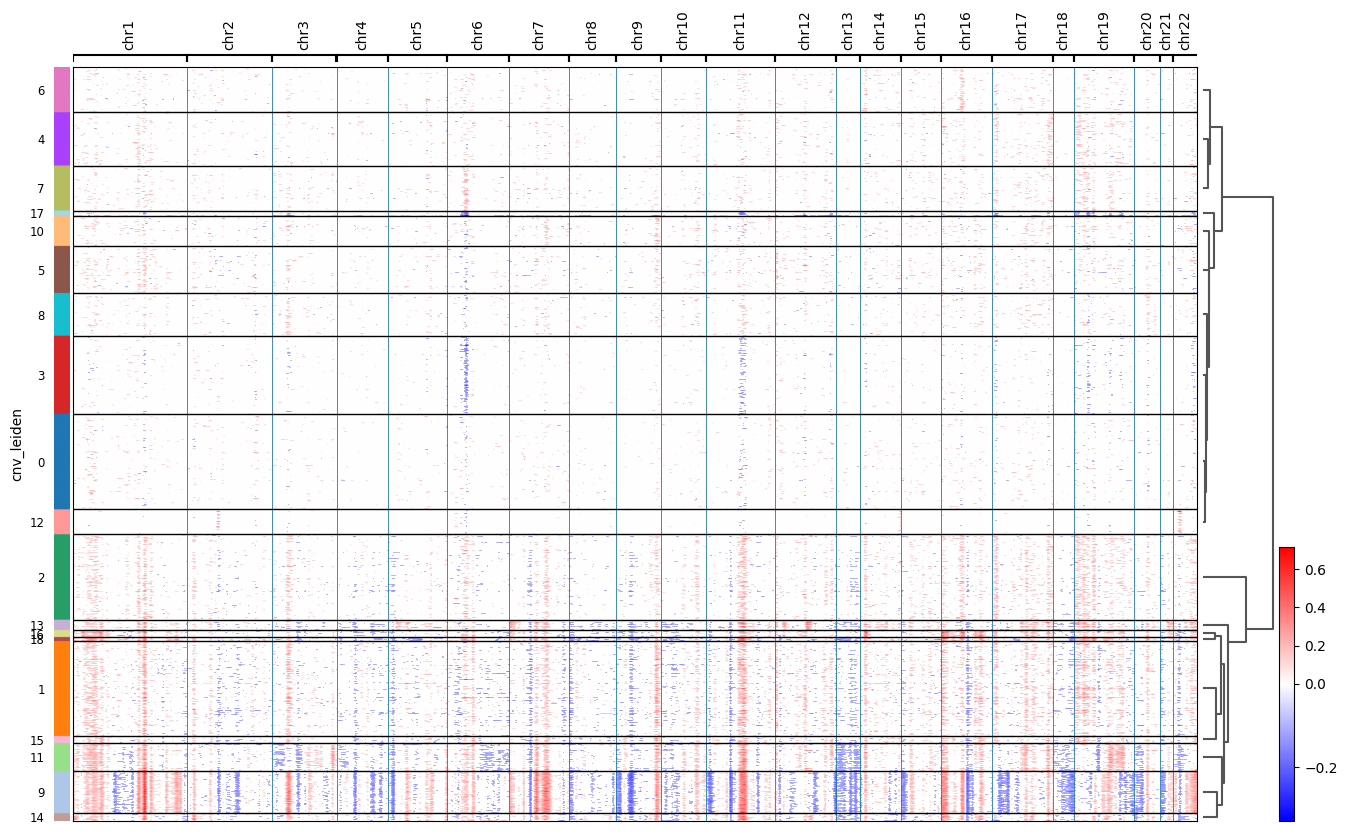

In [24]:
cnv.pl.chromosome_heatmap(adata, groupby="cnv_leiden", dendrogram=True)

In [25]:
cnv.tl.umap(adata)
cnv.tl.cnv_score(adata)

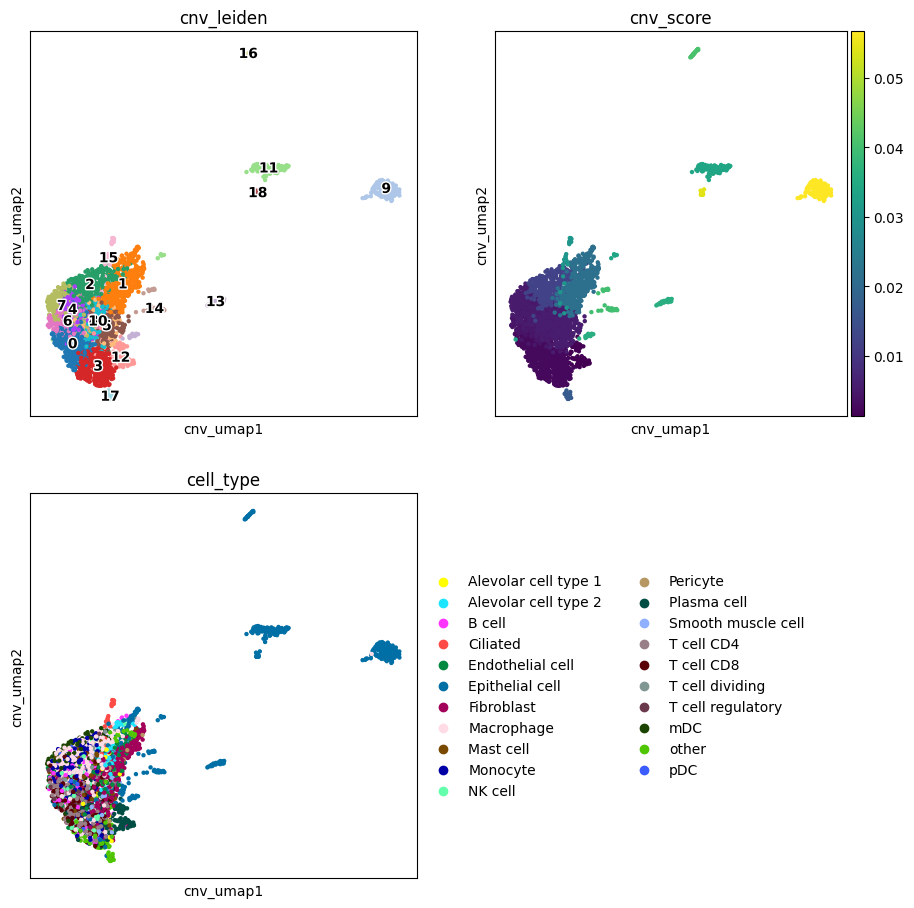

In [26]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(11, 11))
ax4.axis("off")
cnv.pl.umap(
    adata,
    color="cnv_leiden",
    legend_loc="on data",
    legend_fontoutline=2,
    ax=ax1,
    show=False,
)
cnv.pl.umap(adata, color="cnv_score", ax=ax2, show=False)
cnv.pl.umap(adata, color="cell_type", ax=ax3)

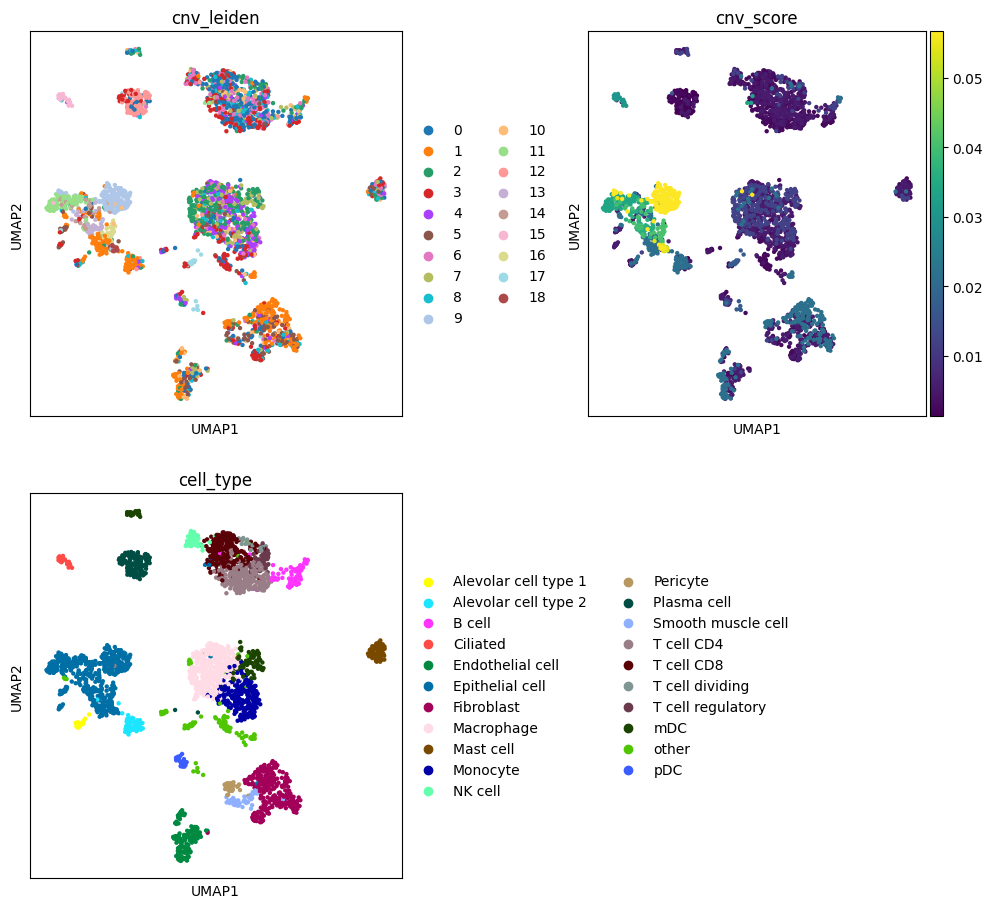

In [27]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 11), gridspec_kw={"wspace": 0.5})
ax4.axis("off")
sc.pl.umap(adata, color="cnv_leiden", ax=ax1, show=False)
sc.pl.umap(adata, color="cnv_score", ax=ax2, show=False)
sc.pl.umap(adata, color="cell_type", ax=ax3)

In [28]:
adata.obs["cnv_status"] = "normal"
adata.obs.loc[adata.obs["cnv_leiden"].isin(["10", "16", "13", "8", "12", "17", "1", "14", "11"]), "cnv_status"] = (
    "tumor"
)

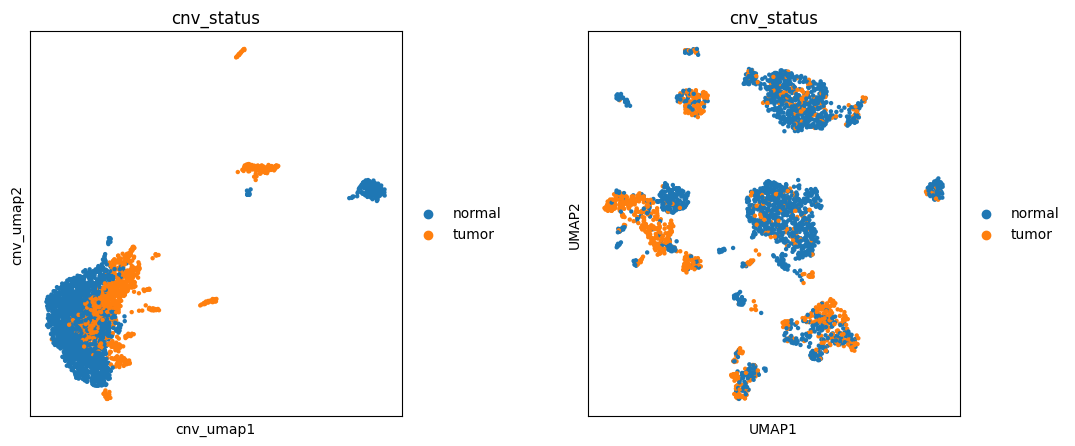

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={"wspace": 0.5})
cnv.pl.umap(adata, color="cnv_status", ax=ax1, show=False)
sc.pl.umap(adata, color="cnv_status", ax=ax2)

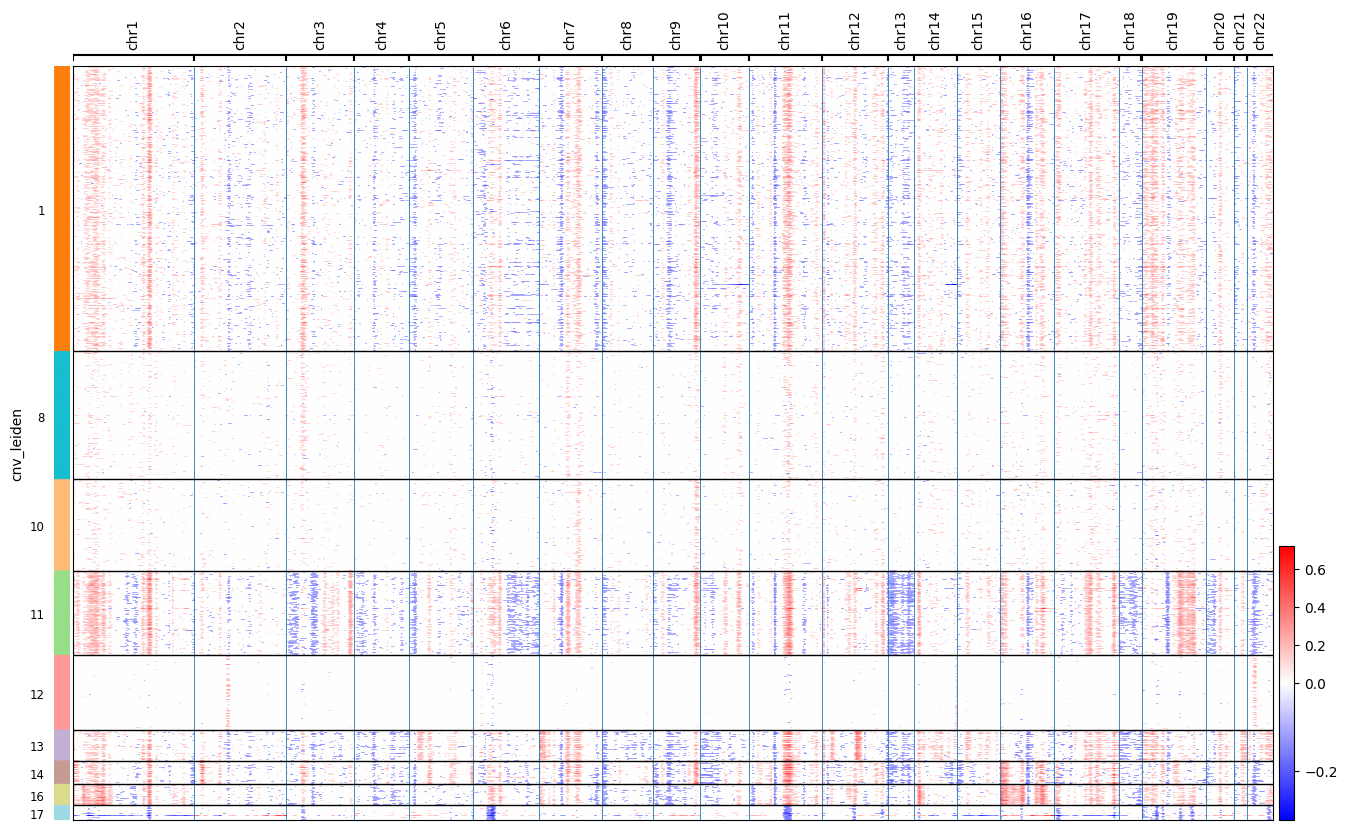

In [30]:
cnv.pl.chromosome_heatmap(adata[adata.obs["cnv_status"] == "tumor", :])

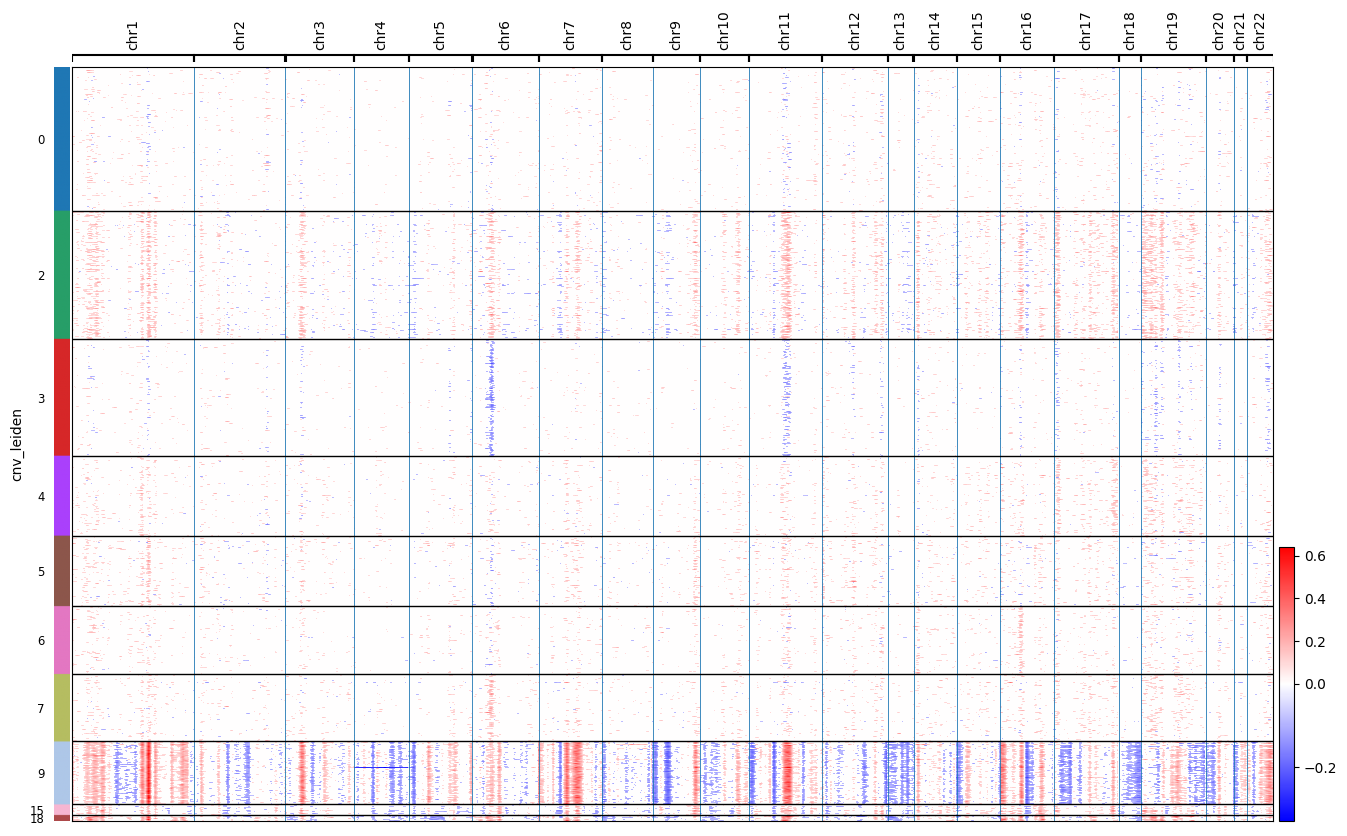

In [32]:
cnv.pl.chromosome_heatmap(adata[adata.obs["cnv_status"] == "normal", :])